In [1]:
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
#load our data
df = pd.read_csv('csgo_round_snapshots.csv',header = 0)
df = df.dropna()


In [3]:
#Extract our weapons features
weapons_ct = df.loc[:, 'ct_weapon_ak47':'ct_weapon_tec9':2]
weapons_t = df.loc[:, 't_weapon_ak47':'t_weapon_tec9':2]


#Compile list of costs for each weapon
cost_list = np.array([2700,3300,4750,1400,500,400,2050,5000,1800,200,5200,2900,3100,1050,1300,1500,1500,1250,1700,1050,2350,600,1100,5000,3000,1700,1200,2000,700,500,200,300,200,500])
cost_list = np.transpose(cost_list)
#Calculate total weapon costs for T and CT
total_cost_ct = np.dot(weapons_ct,cost_list)
total_cost_t = np.dot(weapons_t,cost_list)


In [4]:
#drop our weapons
df_NW = df.drop(df.iloc[:, 16:84], axis = 1)
#insert new features
df_NW.insert(17,"Total Weapon Cost T", np.transpose(total_cost_t))
df_NW.insert(17,"Total Weapon Cost CT", np.transpose(total_cost_ct))

In [5]:
#replace our string values with binary 1/0
df_NW["round_winner"] = np.where(df_NW.round_winner ==  "CT", 1, 0)
df_NW["bomb_planted"] = np.where(df_NW.bomb_planted ==  "True", 1,0)
#separate our dataset into maps
df_dust2 = df_NW.loc[df_NW["map"] == "de_dust2"]
df_inferno = df_NW.loc[df_NW["map"] == "de_inferno"]
df_nuke = df_NW.loc[df_NW["map"] == "de_nuke"]
df_mirage = df_NW.loc[df_NW["map"] == "de_mirage"]
df_overpass = df_NW.loc[df_NW["map"] == "de_overpass"]
df_vertigo = df_NW.loc[df_NW["map"] == "de_vertigo"]
df_train  = df_NW.loc[df_NW["map"] == "de_train"]
#compile a list to loop over
df_lst = [df_dust2,df_inferno,df_nuke,df_mirage,df_overpass,df_vertigo,df_train]

In [6]:
#used to scale our data
scaler = preprocessing.StandardScaler()


In [7]:
def run_nn(activ, regularization): 
    #initialize classifier object
    clf = MLPClassifier(hidden_layer_sizes=(7,7), activation=activation, solver = 'lbfgs',alpha = regularization,  
                        max_iter = 5000, random_state = 1)
    #used to compile our accs
    training_acc = []
    testing_acc = []
    for dataf in df_lst:
        print("Map:", dataf.iloc[0,dataf.columns.get_loc('map')])
    
        
        #extract target and scale our feature matrix
        Y = np.array(dataf.loc[:, dataf.columns == 'round_winner'])
        df = dataf.drop(["map","round_winner"], axis = 1)
        Y=Y.astype(float)
        X_scale = scaler.fit_transform(df)
        X_scale=X_scale.astype(float)
        #split data
        X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y,random_state = 1)
        
        Y_train = Y_train.reshape(Y_train.shape[0],)
        Y_test = Y_test.reshape(Y_test.shape[0],)
        
        #fit our training data
        clf.fit(X_train,Y_train)
        #predict
        Yhat_train = clf.predict(X_train)
        Yhat_test = clf.predict(X_test)
        #calculate accs
        acc_train = accuracy_score(Y_train,Yhat_train)
        training_acc.append(acc_train)

        acc_test = accuracy_score(Y_test,Yhat_test)
        testing_acc.append(acc_test)
        
    #making bargraph    
    data = [training_acc,testing_acc]

    training_acc_avg = np.mean(training_acc)
    testing_acc_avg = np.mean(testing_acc)

    training_acc_averages.append(training_acc_avg)
    testing_acc_averages.append(testing_acc_avg)

    map_names = ["Dust 2", "Inferno", "Nuke", "Mirage", "Overpass", "Vertigo", "Train"]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    spacing = np.arange(len(map_names))

    ax.bar(spacing+0.2, data[0], color = 'b', width = 0.4)
    ax.bar(spacing-0.2, data[1], color = 'g', width = 0.4)

    ax.set_xticks(spacing)
    ax.set_xticklabels(map_names)

    ax.legend(labels=['Training Accuracy', 'Testing Accuracy'], loc = 'lower right')
    ax.text(7,0.5,'Average Training Accuracy: %f'% training_acc_avg, color = 'black',fontsize = 12)
    ax.text(7,0.4,'Average Testing Accuracy: %f' % testing_acc_avg,color = 'black',fontsize = 12)
    
    plt.xlabel("Map")
    plt.ylabel("Accuracy")
    plt.title("Neural Networks: {} Activation, alpha: {}".format(activ, regularization))
    plt.savefig("Neural Networks: {} Activation {}".format(activ, regularization), format = 'png')
    plt.show()

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


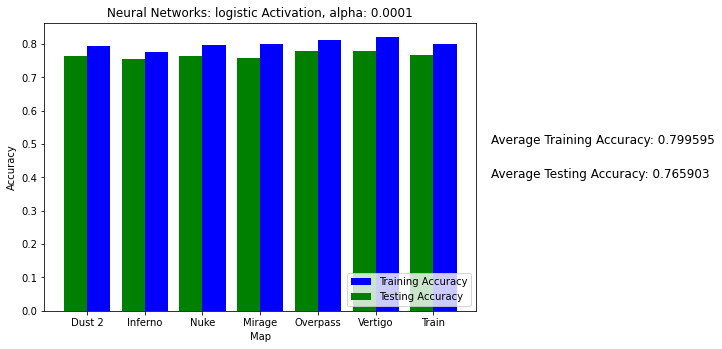

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


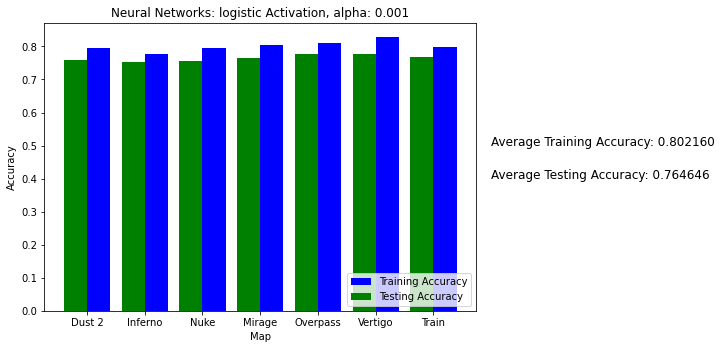

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


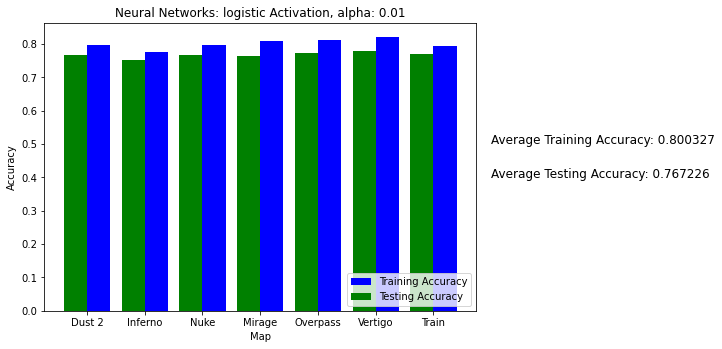

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


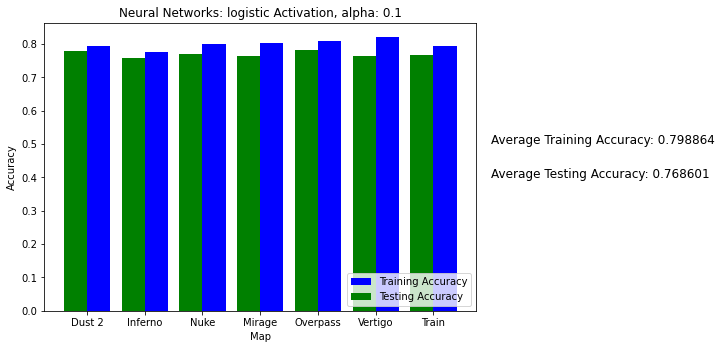

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


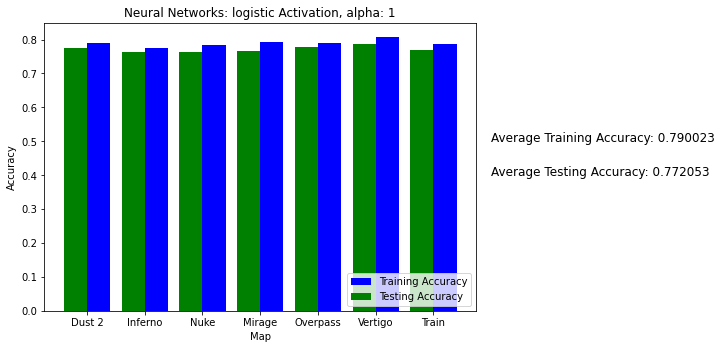

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


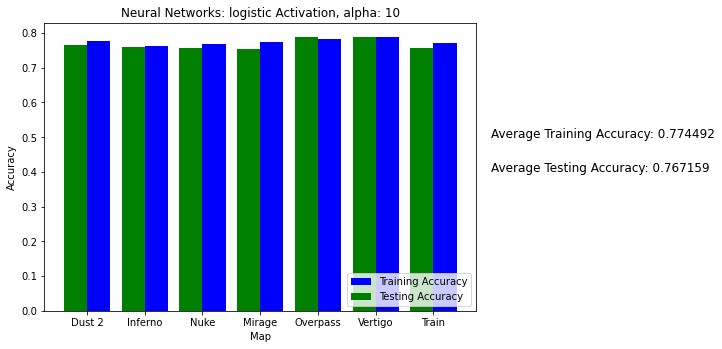

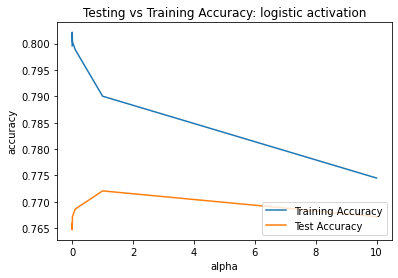

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


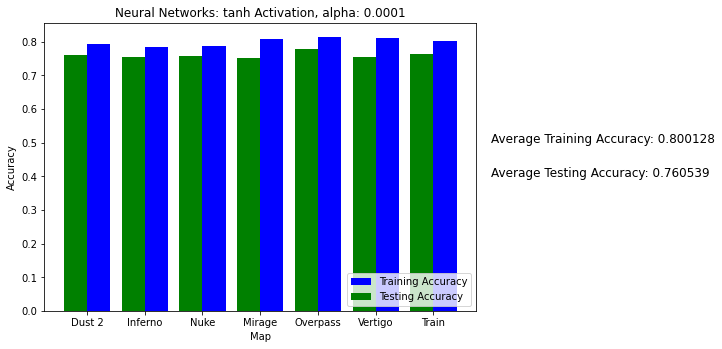

Map: de_dust2
Map: de_inferno
Map: de_nuke


C:\Users\kzhen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Map: de_mirage


C:\Users\kzhen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Map: de_overpass
Map: de_vertigo
Map: de_train


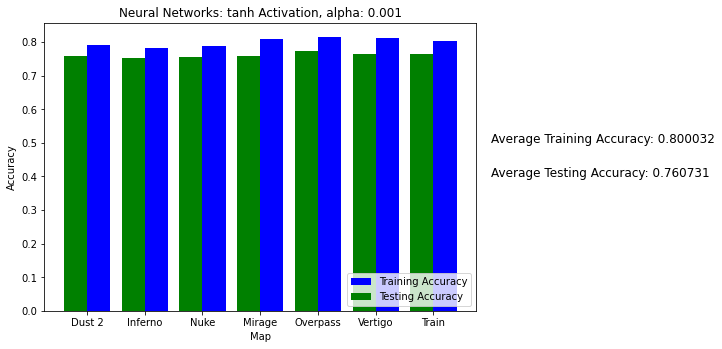

Map: de_dust2
Map: de_inferno
Map: de_nuke


C:\Users\kzhen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


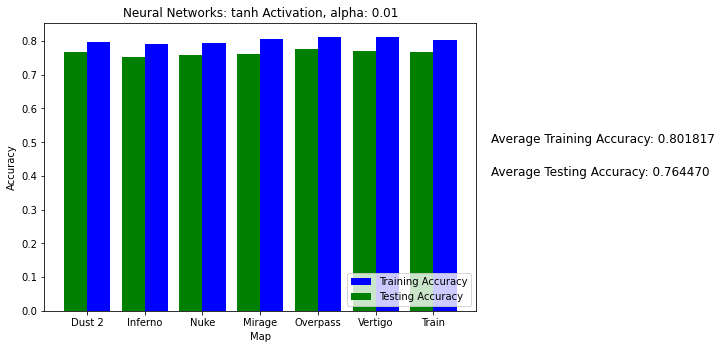

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


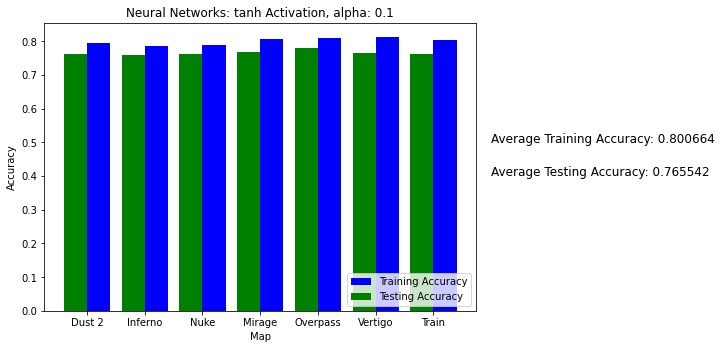

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


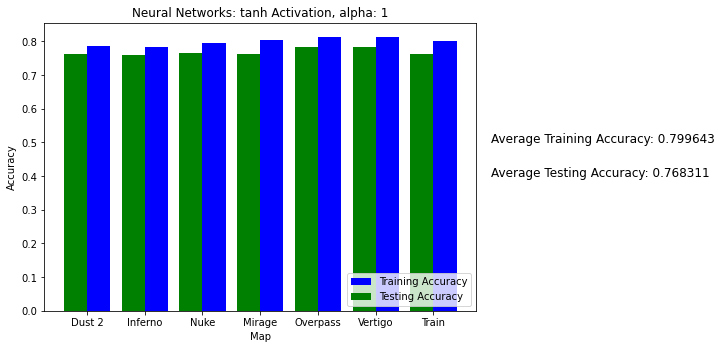

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


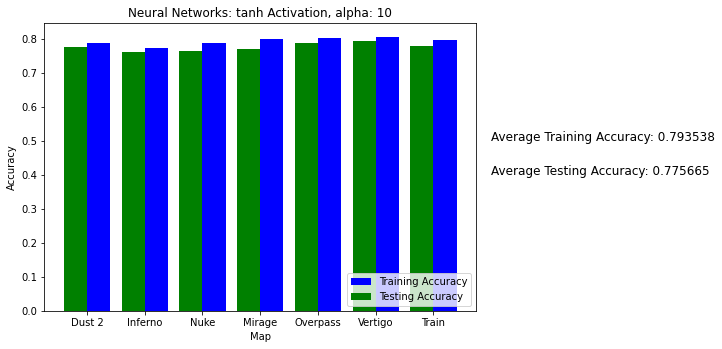

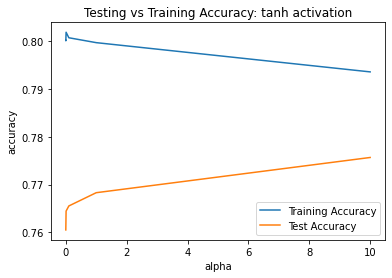

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


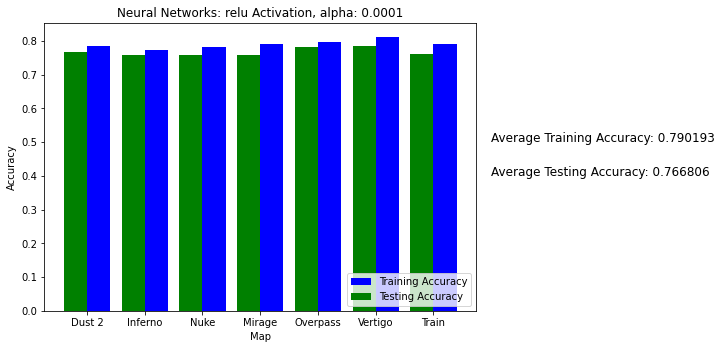

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


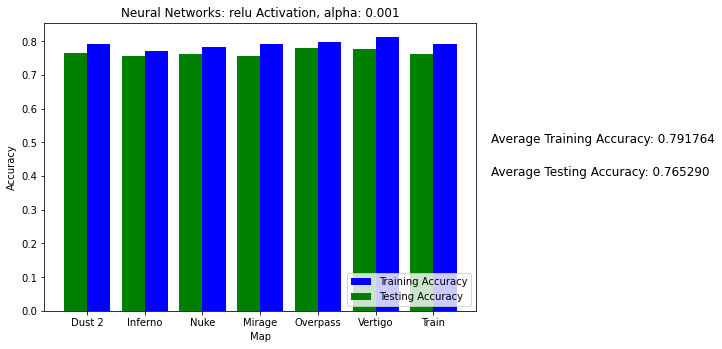

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


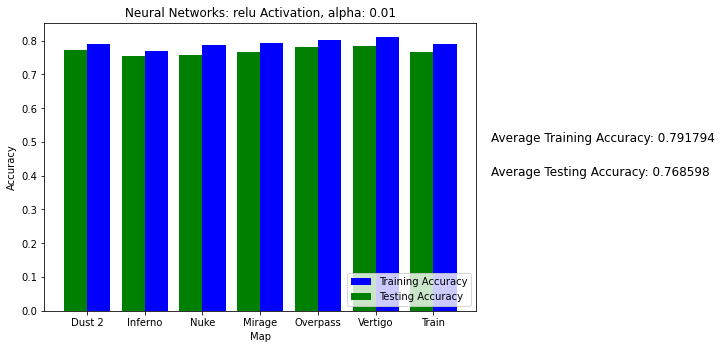

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


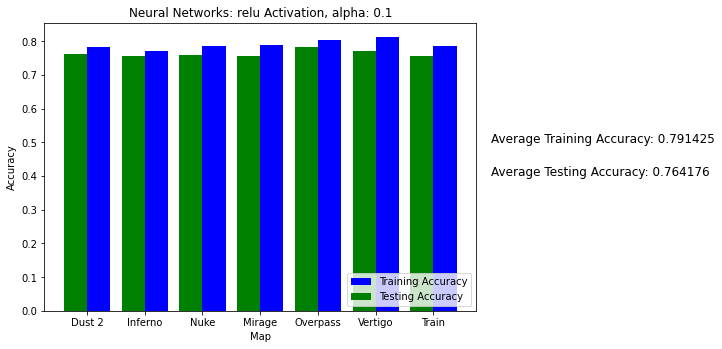

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


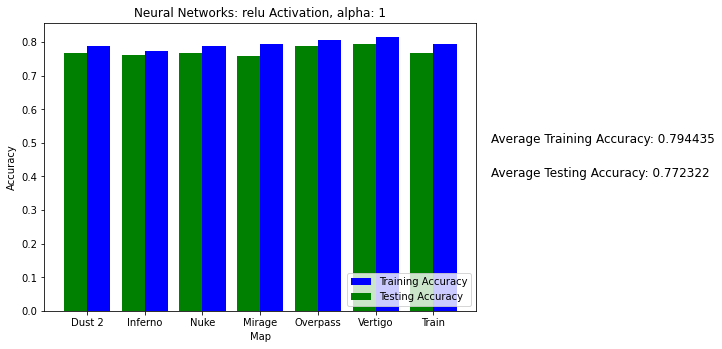

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


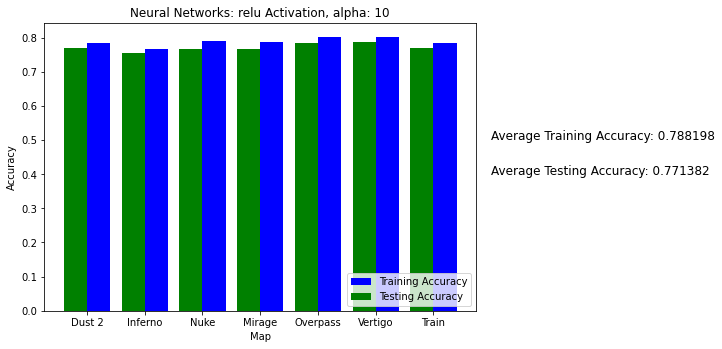

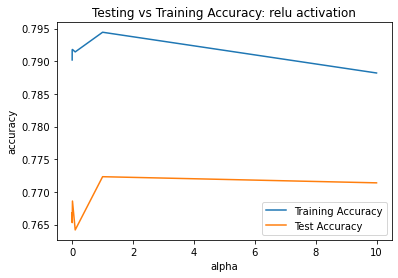

In [8]:
#our predetermined activation functions and alphas
activations = ["logistic", "tanh", "relu"]
alpha = [0.0001,0.001,0.01,0.1,1,10]
#running our neural network and plotting error vs alpha
for activation in activations:
    training_acc_averages = []
    testing_acc_averages = []
    for a in alpha:
        run_nn(activation, a)
    plt.plot(alpha, training_acc_averages)
    plt.plot(alpha, testing_acc_averages)

    plt.title("Testing vs Training Accuracy: %s activation" % activation)
    plt.xlabel("alpha")
    plt.ylabel("accuracy")

              
    plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
    plt.savefig("Testing vs Training Accuracy: %s activation" % activation,format = 'png')
    plt.show()

hi


In [12]:
#Same process as above except in reversed order
def nn_all(alpha_lst, data_lst,activation):
    
    for dataf in df_lst:
        curr_map = dataf.iloc[0,dataf.columns.get_loc('map')]
        acc_test_nn = []
        acc_train_nn = []
        #extract target and features matrix
        Y = np.array(dataf.loc[:, dataf.columns == 'round_winner'])
        df = dataf.drop(["map","round_winner"], axis = 1)
        Y=Y.astype(float)
        X_scale = scaler.fit_transform(df)
        X_scale=X_scale.astype(float)
        #split
        X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y,random_state = 1)
        
        Y_train = Y_train.reshape(Y_train.shape[0],)
        Y_test = Y_test.reshape(Y_test.shape[0],)
        
        for a in alpha_lst:
                #classifier object
                clf = MLPClassifier(hidden_layer_sizes=(7,7), activation=activation, solver = 'lbfgs',alpha = a,  
                    max_iter = 5000, random_state = 1)

                
                #fit
                clf.fit(X_train, Y_train)
                
                #predict
                Yhat_train= clf.predict(X_train)
                Yhat_test = clf.predict(X_test)

                # Find the accuracy achieved on training set and testing set
                acc_train = accuracy_score(Y_train,Yhat_train)
                print("Accuracy on training data = %f" % acc_train)
                acc_train_nn.append(acc_train)

                acc_test = accuracy_score(Y_test,Yhat_test)
                print("Accuracy on testing data = %f" % acc_test)
                acc_test_nn.append(acc_test)

        #plot accuracy vs alpha
        plt.plot(alpha_lst, acc_train_nn)
        plt.plot(alpha_lst, acc_test_nn)

        plt.title("Testing vs Training Accuracy, {}, {} Activation".format(curr_map,activation))
        plt.xlabel("alpha")
        plt.ylabel("accuracy")

            
        plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
        plt.savefig("Testing vs Training Accuracy, {}, {} Activation.png".format(curr_map,activation))
        plt.show()
        
        

Accuracy on training data = 0.793714
Accuracy on testing data = 0.763728
Accuracy on training data = 0.796423
Accuracy on testing data = 0.758671
Accuracy on training data = 0.795701
Accuracy on testing data = 0.765354
Accuracy on training data = 0.791968
Accuracy on testing data = 0.778902
Accuracy on training data = 0.789740
Accuracy on testing data = 0.774205
Accuracy on training data = 0.777637
Accuracy on testing data = 0.765354


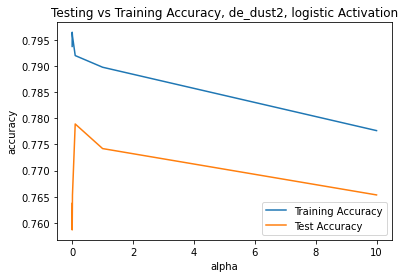

Accuracy on training data = 0.775619
Accuracy on testing data = 0.753738
Accuracy on training data = 0.777523
Accuracy on testing data = 0.751890
Accuracy on training data = 0.776515
Accuracy on testing data = 0.752058
Accuracy on training data = 0.775171
Accuracy on testing data = 0.758441
Accuracy on training data = 0.776235
Accuracy on testing data = 0.764321
Accuracy on training data = 0.761787
Accuracy on testing data = 0.759281


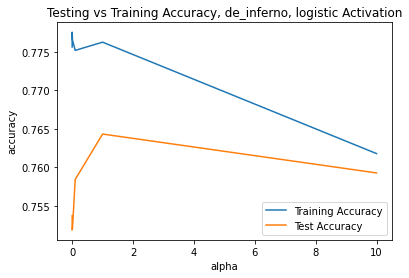

Accuracy on training data = 0.797659
Accuracy on testing data = 0.764557
Accuracy on training data = 0.794575
Accuracy on testing data = 0.754467
Accuracy on training data = 0.795907
Accuracy on testing data = 0.766870
Accuracy on training data = 0.798290
Accuracy on testing data = 0.769392
Accuracy on training data = 0.785254
Accuracy on testing data = 0.763927
Accuracy on training data = 0.767662
Accuracy on testing data = 0.757200


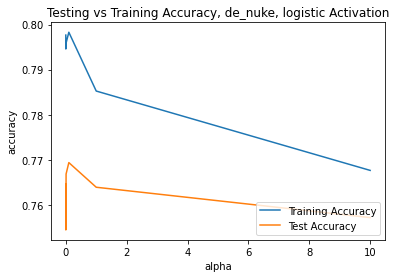

Accuracy on training data = 0.797947
Accuracy on testing data = 0.757106
Accuracy on training data = 0.805412
Accuracy on testing data = 0.764212
Accuracy on training data = 0.807709
Accuracy on testing data = 0.763135
Accuracy on training data = 0.801967
Accuracy on testing data = 0.762920
Accuracy on training data = 0.792923
Accuracy on testing data = 0.765289
Accuracy on training data = 0.772969
Accuracy on testing data = 0.754953


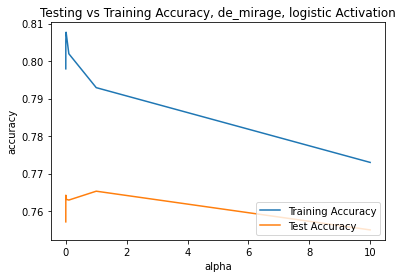

Accuracy on training data = 0.810133
Accuracy on testing data = 0.777904
Accuracy on training data = 0.811742
Accuracy on testing data = 0.776200
Accuracy on training data = 0.811553
Accuracy on testing data = 0.773928
Accuracy on training data = 0.809375
Accuracy on testing data = 0.781028
Accuracy on training data = 0.789394
Accuracy on testing data = 0.779324
Accuracy on training data = 0.781818
Accuracy on testing data = 0.787560


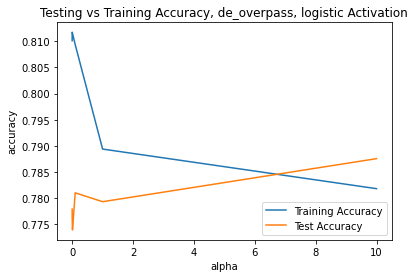

Accuracy on training data = 0.821839
Accuracy on testing data = 0.777020
Accuracy on training data = 0.829981
Accuracy on testing data = 0.777738
Accuracy on training data = 0.821959
Accuracy on testing data = 0.779892
Accuracy on training data = 0.821839
Accuracy on testing data = 0.763734
Accuracy on training data = 0.808908
Accuracy on testing data = 0.787074
Accuracy on training data = 0.789751
Accuracy on testing data = 0.788869


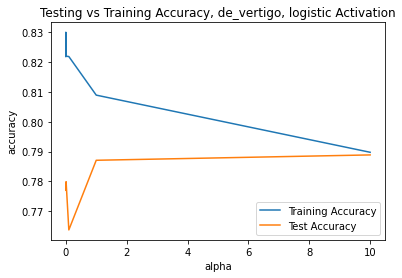

Accuracy on training data = 0.800257
Accuracy on testing data = 0.767269
Accuracy on training data = 0.799466
Accuracy on testing data = 0.769345
Accuracy on training data = 0.792943
Accuracy on testing data = 0.769345
Accuracy on training data = 0.793437
Accuracy on testing data = 0.765787
Accuracy on training data = 0.787705
Accuracy on testing data = 0.770234
Accuracy on training data = 0.769816
Accuracy on testing data = 0.756893


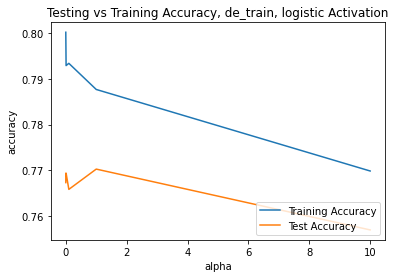

Accuracy on training data = 0.792871
Accuracy on testing data = 0.761922
Accuracy on training data = 0.789379
Accuracy on testing data = 0.759393
Accuracy on training data = 0.795580
Accuracy on testing data = 0.766438
Accuracy on training data = 0.793593
Accuracy on testing data = 0.762464
Accuracy on training data = 0.787632
Accuracy on testing data = 0.761741
Accuracy on training data = 0.786850
Accuracy on testing data = 0.775289


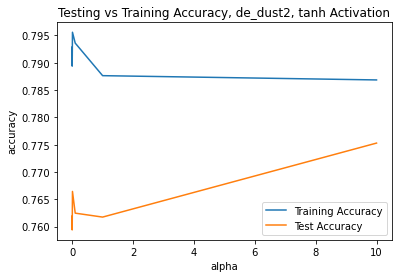

Accuracy on training data = 0.783402
Accuracy on testing data = 0.755753
Accuracy on training data = 0.782898
Accuracy on testing data = 0.752898
Accuracy on training data = 0.789506
Accuracy on testing data = 0.753570
Accuracy on training data = 0.787322
Accuracy on testing data = 0.758441
Accuracy on training data = 0.782954
Accuracy on testing data = 0.760289
Accuracy on training data = 0.773547
Accuracy on testing data = 0.761297


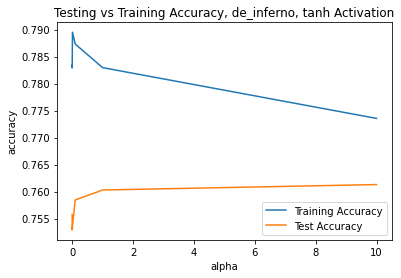

Accuracy on training data = 0.787707
Accuracy on testing data = 0.759092


C:\Users\kzhen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy on training data = 0.787637
Accuracy on testing data = 0.754677


C:\Users\kzhen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy on training data = 0.793244
Accuracy on testing data = 0.758882
Accuracy on training data = 0.787987
Accuracy on testing data = 0.762245
Accuracy on training data = 0.794786
Accuracy on testing data = 0.766239
Accuracy on training data = 0.788197
Accuracy on testing data = 0.764978


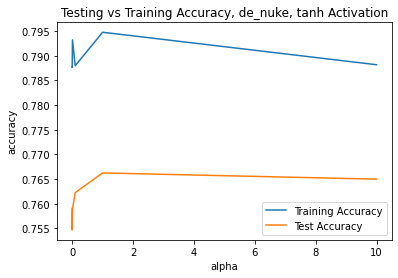

Accuracy on training data = 0.807924
Accuracy on testing data = 0.751077


C:\Users\kzhen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy on training data = 0.808857
Accuracy on testing data = 0.758398
Accuracy on training data = 0.806273
Accuracy on testing data = 0.760767
Accuracy on training data = 0.807565
Accuracy on testing data = 0.767227
Accuracy on training data = 0.804048
Accuracy on testing data = 0.762059
Accuracy on training data = 0.799885
Accuracy on testing data = 0.768734


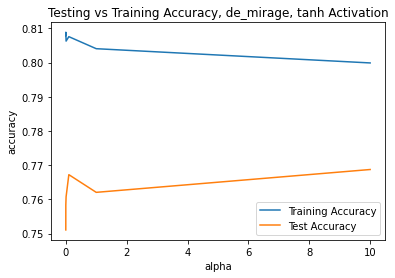

Accuracy on training data = 0.815625
Accuracy on testing data = 0.777336
Accuracy on training data = 0.816004
Accuracy on testing data = 0.772792
Accuracy on training data = 0.812973
Accuracy on testing data = 0.776200
Accuracy on training data = 0.811080
Accuracy on testing data = 0.780176
Accuracy on training data = 0.812973
Accuracy on testing data = 0.782732
Accuracy on training data = 0.802936
Accuracy on testing data = 0.788128


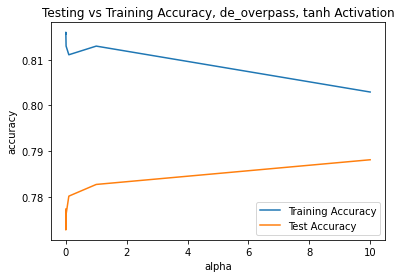

Accuracy on training data = 0.810345
Accuracy on testing data = 0.755476
Accuracy on training data = 0.812620
Accuracy on testing data = 0.762657
Accuracy on training data = 0.811422
Accuracy on testing data = 0.768761
Accuracy on training data = 0.814176
Accuracy on testing data = 0.766607
Accuracy on training data = 0.814655
Accuracy on testing data = 0.783483
Accuracy on training data = 0.806753
Accuracy on testing data = 0.792101


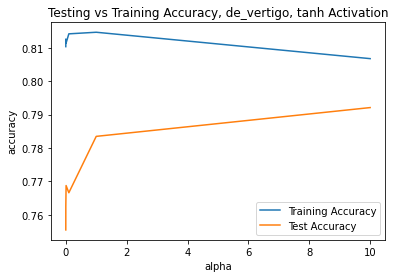

Accuracy on training data = 0.803024
Accuracy on testing data = 0.763119
Accuracy on training data = 0.802827
Accuracy on testing data = 0.764305
Accuracy on training data = 0.803716
Accuracy on testing data = 0.766677
Accuracy on training data = 0.802925
Accuracy on testing data = 0.761637
Accuracy on training data = 0.800455
Accuracy on testing data = 0.761637
Accuracy on training data = 0.796600
Accuracy on testing data = 0.779128


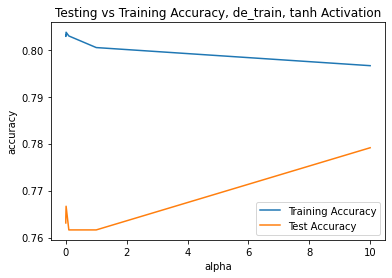

Accuracy on training data = 0.784682
Accuracy on testing data = 0.766980
Accuracy on training data = 0.790703
Accuracy on testing data = 0.765896
Accuracy on training data = 0.790342
Accuracy on testing data = 0.771496
Accuracy on training data = 0.784020
Accuracy on testing data = 0.763186
Accuracy on training data = 0.788054
Accuracy on testing data = 0.767702
Accuracy on training data = 0.784200
Accuracy on testing data = 0.770051


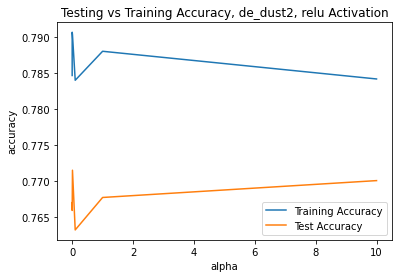

Accuracy on training data = 0.773043
Accuracy on testing data = 0.758609
Accuracy on training data = 0.771419
Accuracy on testing data = 0.757265
Accuracy on training data = 0.769963
Accuracy on testing data = 0.755585
Accuracy on training data = 0.772595
Accuracy on testing data = 0.757769
Accuracy on training data = 0.773827
Accuracy on testing data = 0.761129
Accuracy on training data = 0.767835
Accuracy on testing data = 0.754074


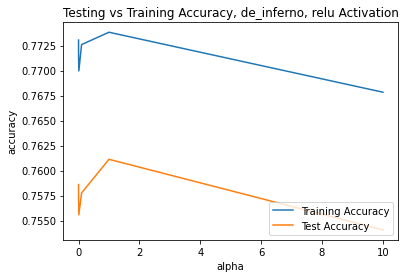

Accuracy on training data = 0.781960
Accuracy on testing data = 0.758671
Accuracy on training data = 0.784062
Accuracy on testing data = 0.760774
Accuracy on training data = 0.786305
Accuracy on testing data = 0.757831
Accuracy on training data = 0.787567
Accuracy on testing data = 0.759302
Accuracy on training data = 0.789249
Accuracy on testing data = 0.768552
Accuracy on training data = 0.789809
Accuracy on testing data = 0.766870


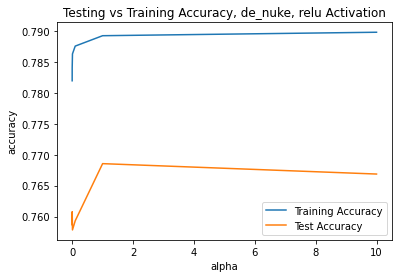

Accuracy on training data = 0.790339
Accuracy on testing data = 0.756891
Accuracy on training data = 0.793066
Accuracy on testing data = 0.754737
Accuracy on training data = 0.791487
Accuracy on testing data = 0.765073
Accuracy on training data = 0.789549
Accuracy on testing data = 0.757321
Accuracy on training data = 0.794215
Accuracy on testing data = 0.757537
Accuracy on training data = 0.788114
Accuracy on testing data = 0.767011


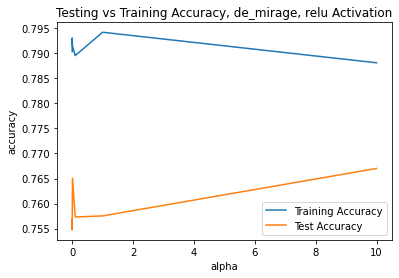

Accuracy on training data = 0.797348
Accuracy on testing data = 0.781312
Accuracy on training data = 0.798295
Accuracy on testing data = 0.779892
Accuracy on training data = 0.802936
Accuracy on testing data = 0.780460
Accuracy on training data = 0.805114
Accuracy on testing data = 0.781880
Accuracy on training data = 0.805398
Accuracy on testing data = 0.787844
Accuracy on training data = 0.803030
Accuracy on testing data = 0.784720


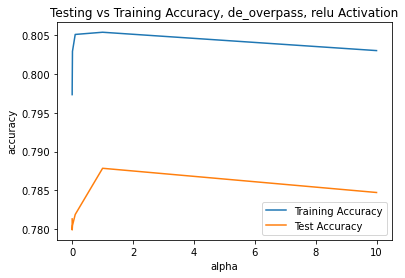

Accuracy on training data = 0.812620
Accuracy on testing data = 0.783842
Accuracy on training data = 0.813937
Accuracy on testing data = 0.775943
Accuracy on training data = 0.812141
Accuracy on testing data = 0.782765
Accuracy on training data = 0.814416
Accuracy on testing data = 0.771993
Accuracy on training data = 0.816571
Accuracy on testing data = 0.795332
Accuracy on training data = 0.800647
Accuracy on testing data = 0.786715


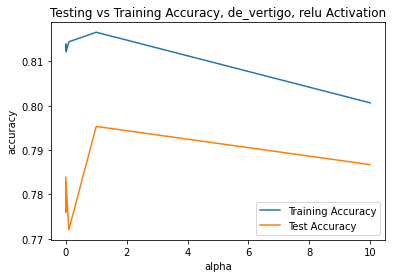

Accuracy on training data = 0.791362
Accuracy on testing data = 0.761340
Accuracy on training data = 0.790868
Accuracy on testing data = 0.762526
Accuracy on training data = 0.789385
Accuracy on testing data = 0.766973
Accuracy on training data = 0.786717
Accuracy on testing data = 0.757782
Accuracy on training data = 0.793734
Accuracy on testing data = 0.768159
Accuracy on training data = 0.783752
Accuracy on testing data = 0.770234


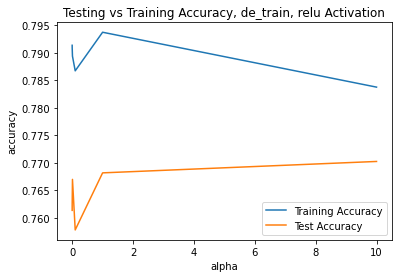

In [13]:
#running our alternative neural network
activations = ["logistic", "tanh", "relu"]
alphas = [0.0001,0.001,0.01,0.1,1,10]
for activation in activations:
    nn_all(alphas,df_lst,activation)